In [105]:
#librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs #genera dataset randmom
from sklearn.model_selection import train_test_split
import seaborn as sns

In [106]:
df= pd.read_csv('/content/drive/MyDrive/Data Analisis/4-Machine Learning/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [107]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [108]:
#genero df con solo valores numéricos
N= df[['Age','RestingBP','Cholesterol', 'MaxHR']]


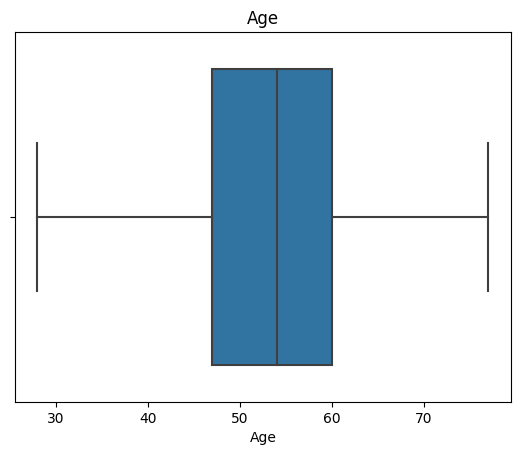

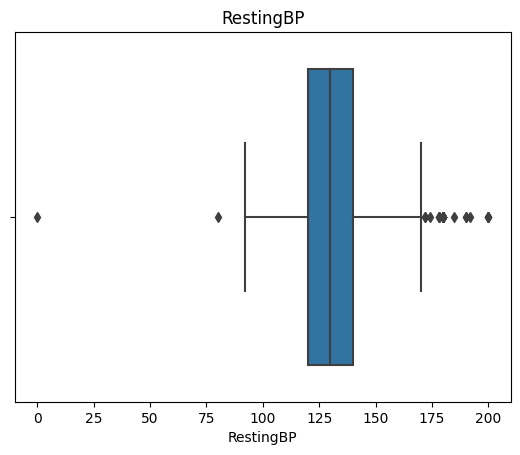

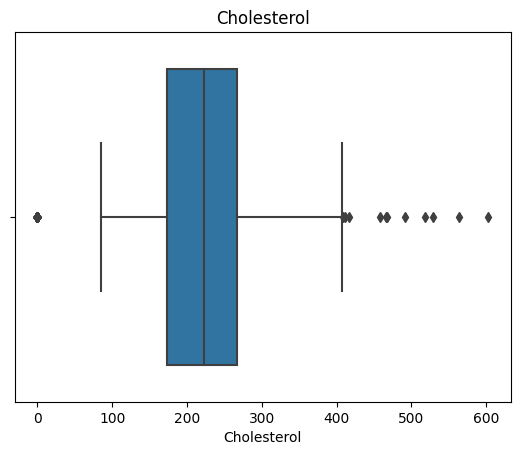

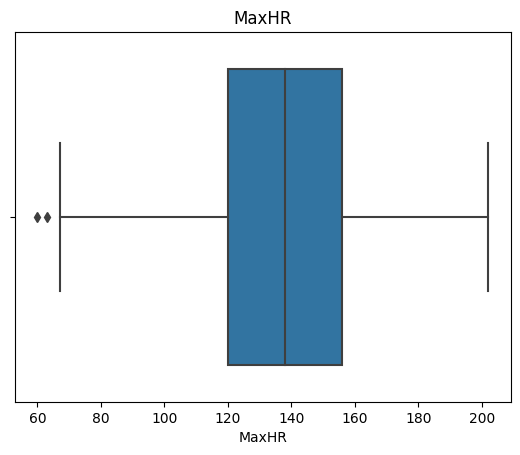

In [109]:
#analizo para buscar valores atípicos
for i in N:
  plt.figure()
  sns.boxplot(x=N[i])
  plt.title(i)
#Conclusion Resting BP y Cholesterol tienen valores atipicos

dos maneras de convertir datos categóricos a numéricos

In [117]:
#manera 1: concateno columnas a convertir
K= df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope' ]]
K


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [118]:
from sklearn.preprocessing import LabelEncoder


In [119]:
for column in K:
   df[column] = LabelEncoder().fit_transform(df[column])




In [120]:
K

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [121]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [99]:
#manera 2: concateno columnas a convertir
#C= df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope' ]]
#C

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [100]:
#Aplico dummies a todas las columnas categóricas
#for i in C:
  #dummie=pd.get_dummies(C[i])
  #C= pd.concat([C,dummie],axis=1)
  #C= C.drop(i, axis=1)



In [ ]:
# quito las columnas y agrego las nuevas columnas creadas con dummies
#df = df.drop(['Sex','ChestPainType','RestingECG', 'ExerciseAngina','ST_Slope'],axis=1)
#ndf= pd.concat([df,C], axis= 1)
#ndf

In [102]:
#ndf.to_csv('hot-dataframe.csv',index = False)

<Axes: >

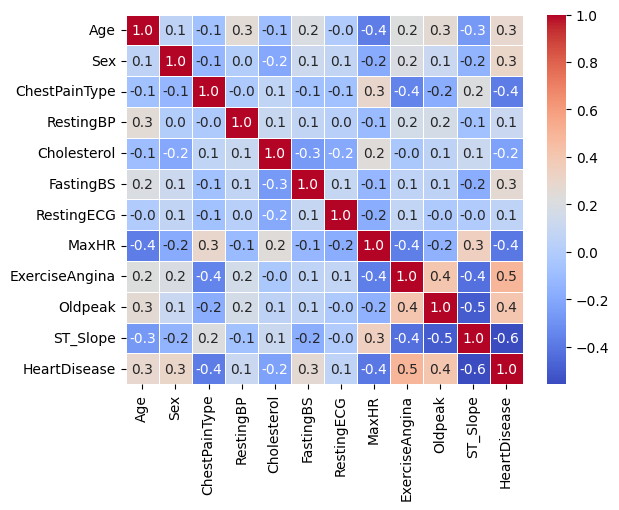

In [130]:
#correlation map
sns.heatmap(df.corr(), cmap='coolwarm',annot=True,fmt='.1f',linewidths=.7)